In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
print("done")

done


# MATRIX MULTIPLICATION ( PERKALIAN MATRIX )

** DIGUNAKAN DI **
- DENSE LAYER : Y = W x + b
- transformer attention : attention = softwmax(QK.T)V
- convolution 


In [3]:
# matrix multiplication basic
A = np.array([[1,2],[2,3],[5,6]]) # 3 x 2
B = np.array([[7,8,9], [10,11,12]]) # 2x 3

C = A @ B # np.matmul(A,B) atai np.dot(A,B)

print(f"A shape {A.shape}")
print(f"B shape {B.shape}")
print(f"A @ B : {C.shape}")
print(f"\nresult :\n {C}")

# aturan : (mxk) @ (kxn) = (mxn)
# kolom a harus sama dengan baris b

A shape (3, 2)
B shape (2, 3)
A @ B : (3, 3)

result :
 [[ 27  30  33]
 [ 44  49  54]
 [ 95 106 117]]


In [20]:
# aplikasi : dense layer dalam neural network
# y = Wx + b

batch_size = 4
input_dim = 3
output_dim = 2

# input : 4 samplles, 3 features each
X = np.random.randn(batch_size, input_dim)

# weight matrix
W = np.random.randn(input_dim, output_dim)
b = np.random.randn(output_dim)

# fprward pass
output = X @ W + b

print(f"input x shape : {X.shape}")
print(f"weiht W shape : {W.shape}")
print(f"output shape : {output.shape}")
print(f"\noutput ( y = Wx +b ) :\n{output}")

input x shape : (4, 3)
weiht W shape : (3, 2)
output shape : (4, 2)

output ( y = Wx +b ) :
[[-0.78788731  0.42832432]
 [-0.95679687  0.61158345]
 [-4.11173313  0.57966703]
 [-3.01189764  1.1221734 ]]


In [4]:
# aplikasi : batch processing dalam training
# proses banuak sample seklagius dengan 1 matrix multiplication

def dense_layer(X,W,b, activation='relu'):
    z = X @ W + b 
    if activation == 'relu':
        return np.maximum(0,z)
    elif activation == 'sigmoid':
        return 1 / (1 + np.exp(-z))
    return z

# mini bartch of 32 sample
X_batch = np.random.randn(32,128) # 32 sample, 128 features
W1 = np.random.randn(128,64) * 0.01
b1 = np.zeros(64)
W2 = np.random.randn(64,10) * 0.01
b2 = np.zeros(10)

# forward through 2 layes
h1 = dense_layer(X_batch, W1, b1, 'relu')
output = dense_layer(h1,W2, b2, 'sigmoid')

print(f"input : {X_batch.shape}")
print(f"after layer 1 : {h1.shape}")
print(f"final output : {output.shape}")
print(f"\n Semua 32 sample diproses SEKALIGUS dengan matrix multiplication!")

input : (32, 128)
after layer 1 : (32, 64)
final output : (32, 10)

 Semua 32 sample diproses SEKALIGUS dengan matrix multiplication!


# 2.2 MATRIX TRANSPOSE

## aplikasi

- shape matching untuk perkalian matriks
- gradient computation
- batch data representation


In [12]:
A = np.array([[1,2,3], [4,5,6]])

print(f"A:\n {A}")
print(f"shape : {A.shape}")
print(f"\n A.T :\n {A.T}")
print(f"A.T.shape : {A.T.shape}")


# aplikasi : gram matrix ( A @ A.T)
gram = A @ A.T
print(f"\n gram matrix (A @ A.T ) : {gram}")
print(f"gram metrix dipakai di neural style transfer")

A:
 [[1 2 3]
 [4 5 6]]
shape : (2, 3)

 A.T :
 [[1 4]
 [2 5]
 [3 6]]
A.T.shape : (3, 2)

 gram matrix (A @ A.T ) : [[14 32]
 [32 77]]
gram metrix dipakai di neural style transfer


In [14]:
# aplikasi gradient dalam linear regression
# gradient = X.T @ (prediction - y) /n

X = np.random.randn(100,5) # 100 sample 5 features
y = np.random.randn(100)
w = np.random.randn(5)

# prediction
pred = X @ w

# gradient (simplified )
gradient = X.T @ ( pred - y ) / len(y)

print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")
print(f"Gradient shape : {gradient.shape}")
print(f"gradient : {gradient}")


X shape : (100, 5)
y shape : (100,)
Gradient shape : (5,)
gradient : [-1.08516112  0.28393054  0.27179497  0.40638961 -1.08168977]


---
## 2.3 Identity Matrix

**Sifat:** $AI = IA = A$

**Aplikasi:**
- Ridge Regression: $(X^TX + \lambda I)^{-1}X^Ty$
- Initialization
- Orthogonality check

In [21]:
# identitas matrix
I = np.eye(3)
print(f"identity 3x3 :\n{I}")

A = np.array([[1,2,3],[2,3,4],[5,6,7]])
print(f"\n A @ I = A ? {np.allclose(A @ I, A)}")
print(f"I @ A = A? {np.allclose(I @ A, A)}")

# APLIKASI RIDGE REGRESSION
X = np.random.randn(100,5)
y = np.random.randn(100)
lambda_reg = 0.1

# closed form solution : ( X.T @ X +  λI)^(-1) @ X.T @ y
XtX = X.T @ X
regularized = XtX + lambda_reg * np.eye(5)
w_ridge = np.linalg.inv(regularized) @ X.T @ y

print(f"\nRidge weight : {w_ridge}")

identity 3x3 :
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

 A @ I = A ? True
I @ A = A? True

Ridge weight : [-0.10692323 -0.26759441 -0.21885528  0.12087421 -0.02821597]


---
## 2.4 Inverse Matrix

**Sifat:** $A \cdot A^{-1} = A^{-1} \cdot A = I$

**Aplikasi:**
- Closed-form Linear Regression: $w = (X^TX)^{-1}X^Ty$
- Theoretical analysis

In [28]:
# matrix lnverse
A = np.array([[4,7], [2,6]])
A_inv = np.linalg.inv(A)

print(f"A : \n{A}")
print(f"\n A inverse:\n {A_inv}")
print(f"\n A @ A_inv : {A @ A_inv}")
print(f"\nApprox Identity? {np.allclose(A @ A_inv, np.eye(2))}")

A : 
[[4 7]
 [2 6]]

 A inverse:
 [[ 0.6 -0.7]
 [-0.2  0.4]]

 A @ A_inv : [[ 1.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  1.00000000e+00]]

Approx Identity? True


In [34]:
# aplikasi : normal equation ( linear regression closed form )
# w = (X.T @ X)^ @ X.T @ y

#generate data
np.random.seed(42)
X = np.column_stack([np.ones(50), np.random.randn(50,2)]) ## add bias
true_w = np.array([2,3,-1])
y = X @ true_w + np.random.randn(50) * 0.1

# solve using normal equation
w_opti = np.linalg.inv(X.T @ X) @ X.T @ y

print(f"true weight {true_w}")
print(f"Learned weight : {w_opti}")
print(f"tip : dala, praktik , gunaakn np.linalg.lstsq() untuk stabilitas numerik")

true weight [ 2  3 -1]
Learned weight : [ 1.99399302  2.98741247 -1.00514317]
tip : dala, praktik , gunaakn np.linalg.lstsq() untuk stabilitas numerik


---
## 2.5 Determinant & Rank

**Determinant:** Mengukur "volume" transformasi matriks
- det(A) = 0 -> matriks singular (tidak invertible)

**Rank:** Jumlah dimensi independen
- Rank < min(rows, cols) -> matriks rank-deficient

In [43]:
# determinant 
a = np.array([[4,7], [2,6]])
b = np.array([[1,2], [2,4]]) # singular ( row w =  w *row 1 )

print(f"det(a) = {np.linalg.det(a):.4f}")
print(f"det(b) = {np.linalg.det(b):.4f} ( singular! ) ")

# rank 
print(f"\nrank (A) = {np.linalg.matrix_rank(a)}")
print(f"\nrank (B) = {np.linalg.matrix_rank(b)} (rank-deficient) ")

# check invertibility
print(f"\nA invertible ? {np.linalg.det(a) !=0}")
print(f"\nB invertible ? {np.linalg.det(b) !=0}")

det(a) = 10.0000
det(b) = 0.0000 ( singular! ) 

rank (A) = 2

rank (B) = 1 (rank-deficient) 

A invertible ? True

B invertible ? False


---
## 2.6 Eigenvalues & Eigenvectors

**Definisi:** $Av = \lambda v$
- v = eigenvector (arah yang tidak berubah)
- λ = eigenvalue (faktor skala)

**Aplikasi:**
- PCA: Eigenvector dari covariance matrix
- Spectral Clustering
- Stability Analysis

In [52]:
# eigendecompositon
A = np.array([[4,-2], [1,1]])

eigenvalues , eigenvectors = np.linalg.eig(A)

print(f"matrix a : \n{A}")
print(f"\neigenvalues : {eigenvalues}")
print(f"\neigenvector ( columns) : \n {eigenvectors}")

# verify : A @ v = λ * v
v1 = eigenvectors[:,0]
lambda1 = eigenvalues[0]
print(f"\nverification : a @ V1 = {A @ v1}")
print(f"             λ1 * v1 = {lambda1 * v1}")

matrix a : 
[[ 4 -2]
 [ 1  1]]

eigenvalues : [3. 2.]

eigenvector ( columns) : 
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]

verification : a @ V1 = [2.68328157 1.34164079]
             λ1 * v1 = [2.68328157 1.34164079]


eigenvalues ( variance explained) :  [2.76559995 0.33433809]

 principal components:
 [[ 0.84854184 -0.52912829]
 [ 0.52912829  0.84854184]]


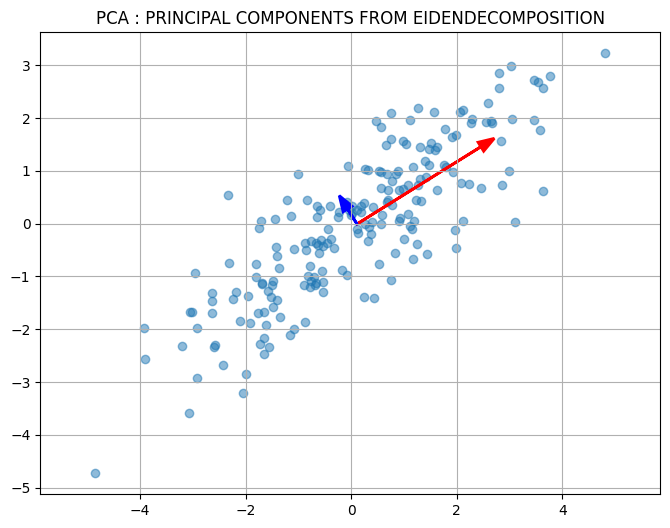

In [64]:
# aplikasi : PCA menggunakan eigendecomposition
from sklearn.decomposition import PCA

# generate correlated data
mean = [0,0]
cov = [[3,2], [2,2]]
X = np.random.multivariate_normal(mean,cov, 200 )

# compute convariance matrix 
X_centered = X - X.mean(axis=0)
cov_matrix = (X_centered.T @ X_centered) / len(X) - 1

# edigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort by eigenvalues ( descending )
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]


print("eigenvalues ( variance explained) : ", eigenvalues)
print("\n principal components:\n", eigenvectors)

# visualize
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:,1],alpha=0.5)
origin = X.mean(axis=0)
for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
    plt.arrow(origin[0], origin[1], vec[0]*val, vec[1]*val,
              head_width=0.2, color=['red', 'blue'][i], linewidth=2)
plt.title('PCA : PRINCIPAL COMPONENTS FROM EIDENDECOMPOSITION')
plt.axis('equal')
plt.grid(True)
plt.show()